## Lecture 3

##### Convergence

The sequence below somehow does not converge. 
$$
X_k =
\left\{
\begin{aligned}
 \cos (\frac{2\pi k}{10} - 2^{-k}) \\
 \sin (\frac{2\pi k}{10} - 2^{-k})
\end{aligned}
\right.
$$
A sequence has a **limit point** or **accumulation point** when there is a subsequence that converges to $x^*$. 

If ${x_k}$ is the sequence;

then if $y_j = x_{k_j}$ (e.g. $y_j = x_{10j+1})$ is a new sequence and if $y_j \to y^*$ then $y^*$ is a limit point.

In [8]:
using Plots, LinearAlgebra, Statistics, Random, Printf

function seqvals(n)
  X = zeros(n, 2)
  for k=1:n
    X[k,1] = cos(2*pi*k/10 - 2.0^(-k))
    X[k,2] = sin(2*pi*k/10 - 2.0^(-k))
  end
  return X
end

seqvals (generic function with 1 method)

In [ ]:
X = seqvals(1000)
scatter(X[:,1], X[:,2])

Prove that this converges:
$$
S(k)=\begin{bmatrix}
2^{-k}\cos(k)+1 \\ 2^{-k}sin(k)
\end{bmatrix}
$$

this converges since $2^{-k}$ goes to zero and $|\cos(k)|$ is bounded.
$$
\lim_{k \to \infty}S(k)=\begin{bmatrix}1 \\ 0 \end{bmatrix}
$$

A sequence is called **Cauchy** if for any $\epsilon > 0$, there exists a $J$ s.t. $||x_k - x_l|| \leq \epsilon$ for all $k \ge J$.

**Cauchy** infers **convergence**.

How fast does a sequence converge?

#### Notion of speed

##### Linear Convergence
Linear convergence = geometric = exponential

If
$$
\frac{||x_{k+1}-x^*||}{||x_{k}-x^*||} \le \rho < 1
$$

We say $x_k$ converges linearly (Q-linear).

$$
||x_{k+1}-x^*|| \le \rho^k||x_{0}-x^*||
$$, 

let $$||x_{0}-x^*||=\delta$$

we have $$\lg(\rho^k\delta)=k\lg(\rho)+\lg(\delta)$$

linear is slow convergence.

e.g. steepest descent

##### Arithmetic convergence

$$
||x_{k}-x^*|| \le \frac{1}{k^\gamma}\delta_0
$$

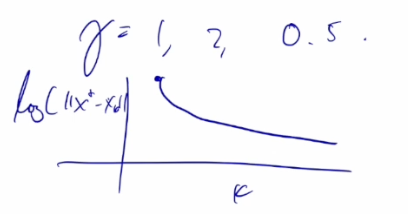

e.g. mont carlo approximation for intergration

##### Superlinear Convergence

Superlinear

$$
\lim_{k \to \infty}\frac{||x_{k+1}-x^*||}{||x_{k}-x^*||}=0
$$

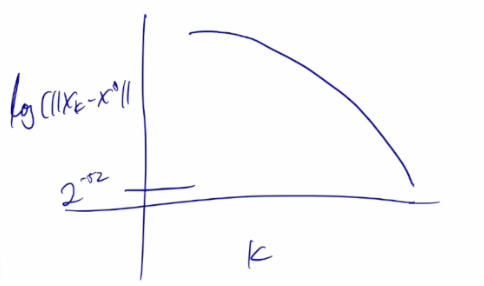

Quadratic

$$
\frac{||x_{k+1}-x^*||}{||x_{k}-x^*||^2} \le \mu
$$

Cubic

$$
\frac{||x_{k+1}-x^*||}{||x_{k}-x^*||^3} \le \mu
$$

In [ ]:
# setup plot data
k = 1:60

# Linear
seq = 0.85.^k
plot(k, seq, lab="Linear", yaxis=:log10, color="black", linewidth=2)

# Arithmetic
plot!(k, 1.0./k, lab="Arithmetic", yaxis=:log10, color="green", linewidth=2)

seq = 1.0./(k.^2)
plot!(k, seq, lab="Arithmetic2", yaxis=:log10, color="green", linewidth=2)

# Superlinear
seq = (2*k).^(-0.05*k)
plot!(k, seq, lab="Superlinear", yaxis=:log10, color="red", linewidth=2)

# Quadratic
# overflow for k = 60
t = 1:18
seq = (0.99).^(2.0.^t)
plot!(t, seq, lab="Quadratic", yaxis=(:log10, (1e-8, 1)), color="magenta", linewidth=2)

# Cubic
t = 1:12
seq = (0.99).^(3.0.^t)
plot!(t, seq, lab="Cubic", yaxis=(:log10, (1e-8, 1)), color="yellow", linewidth=2)

#### Norm

for any orders of norm $||x||_1$ and $||x||_2$, it holds that
$$
C_1||x||_1 \le ||x||_2 \le C_2||x||_1
$$

**How to show a sequence does NOT converge?**

Show for all $x^*$ there exists a $\epsilon$ s.t. the sequence never gets closer to $\epsilon$.


### Lecture 4

+ Guropi/CPLEX/MOSEC
+ Linear Progs/Quad Progs/Integer Opt

+ Matlab/Scipy/R/Optim JL
+ LPs
+ General Solvers
+ BFGS/GD/Line Search

**Structure Model Languages**: Human readible description of optimization -> software comprehensive

+ CVX/Jump.jl/Conve.jl/AMPL/Pytorch/Tensorflow
+ CVX -> Sedumi
+ Jump -> variaty of solvers
+ Pytorch/Tensorflow -> Gradient Descent

**Specialized Solver**:

**SPGL1**: Find eigenvalues for matrices

**Rubrics** for an optimization software:
+ Ease of use
+ Speed
+ Cost
+ Scale
+ Generality

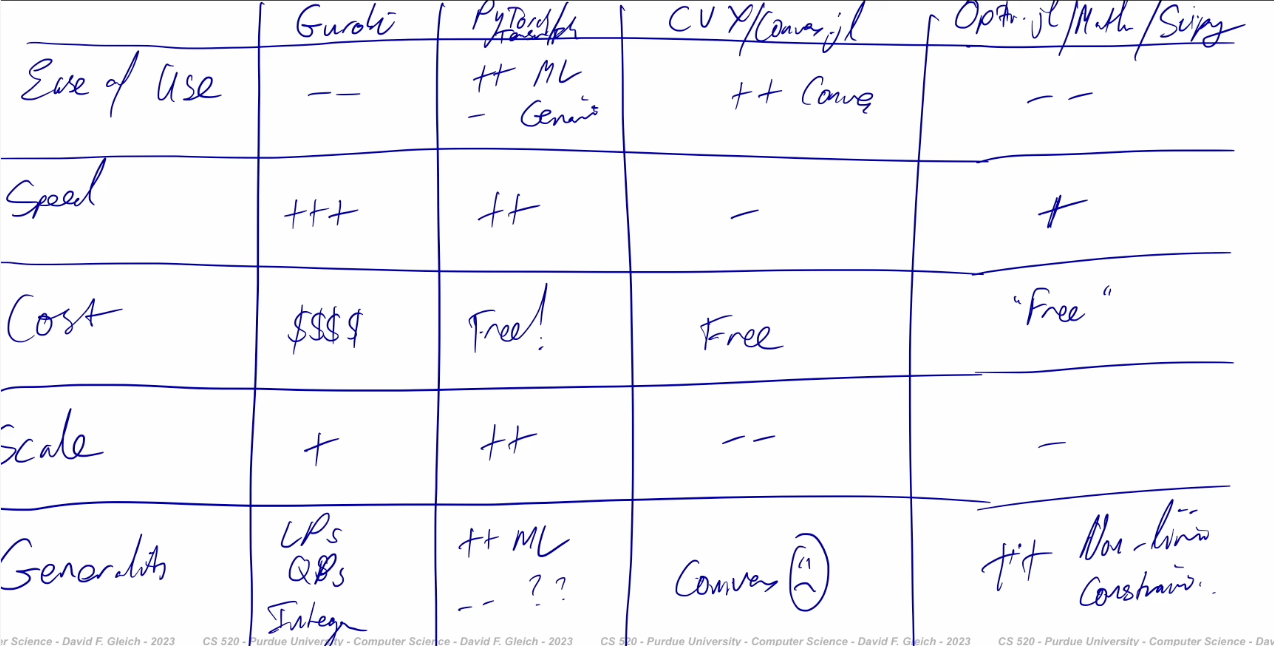

#### Least Squares

Given $(x_i, y_i), i=1, \dots, n.$, find $a, b$ to minimize
$$
\sum_i^n(yi-(ax_i+b))^2
$$


In [ ]:
import Pkg; 
Pkg.add("Convex")
Pkg.add("SCS")

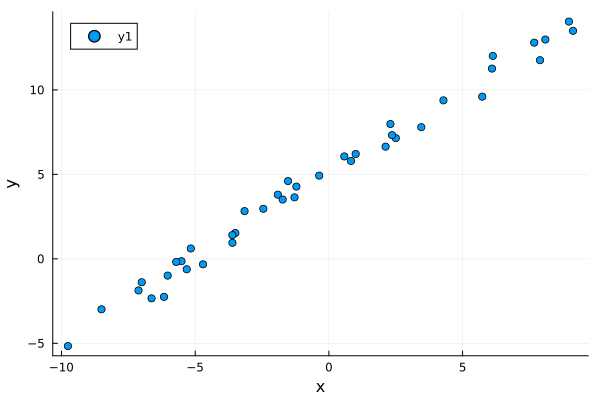

In [9]:
using Convex, SCS
## Step 1: Create a set of data with a linear model
m=40
n=2
A = randn(m,n)
xex = [5;1]      # "b" = 5 in ax+b and a=1
pts = -10.0 .+ 20*rand(m,1)
A = [ones(m,1) pts]
b = A*xex + .5*randn(m,1)
## Show the linear model
scatter(pts,b, dpi=300)
xlabel!("x")
ylabel!("y")

In [ ]:
## The convex.jl problem
x = Variable(n)
problem = minimize(sumsquares(b - A*x))
solve!(problem, SCS.Optimizer)
xls = x.value
@show x
## Show the least squares fit
scatter(pts,b;label="data")
plot!([-11; 11], [1 -11; 1 11]*xls;label="fit")
#xaxis!([-11 11])
title!("Least-square fit")
xlabel!("x")
ylabel!("y")

#### Robust Regression

**Huber Loss**: Quadratic when error is small, Linear when error is huge.
Dampen the effect of outliers and how much they change the solutions.
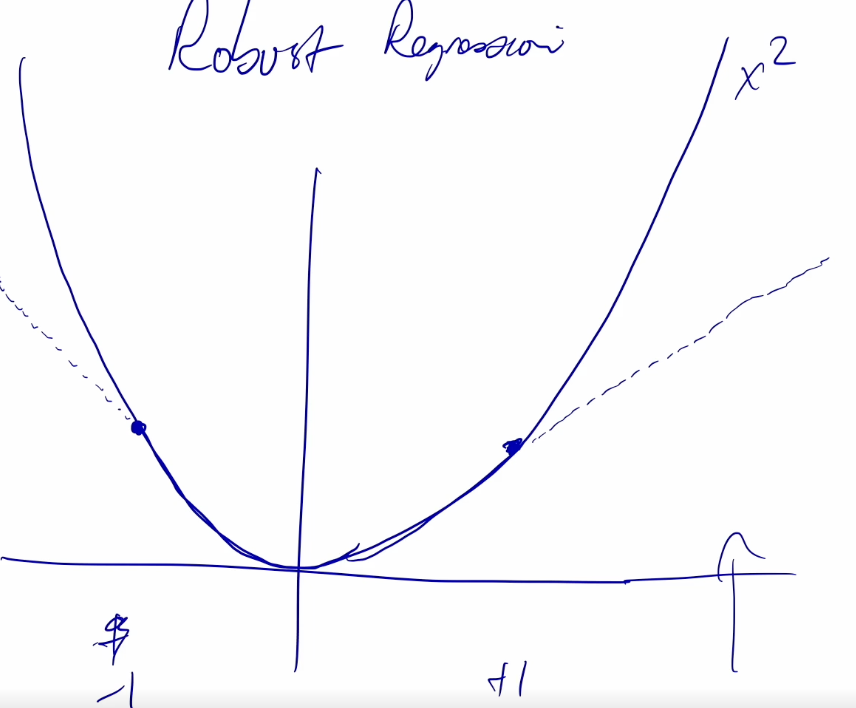

------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 5, constraints m: 48
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 1
	  q: soc vars: 46, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 90, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 3.52e+01  1.00e+00  2.75e+01 -2.38e+00  1.00e-01  7.70e-05 
   250| 7.65e+00  2.41e-02  8.70e-02  9.35e+02  2.31e-02  5.26e-04 
   425| 6.7

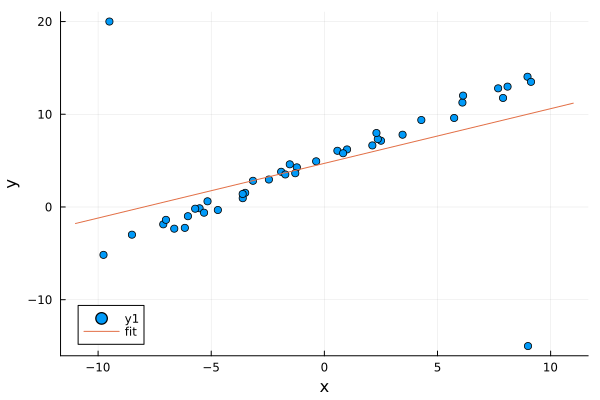

In [11]:
## Now we add outliers
outliers = [-9.5; 9]
outvals = [20; -15]
A = [A; ones(length(outliers),1) outliers]
b = [b; outvals]
m = size(A,1)
pts = [pts;outliers]

## Show the new data
scatter(pts,b)
xlabel!("x")
ylabel!("y")

## Look at the LS fit
x = Variable(n)
problem = minimize(sumsquares(b - A*x))
solve!(problem, SCS.Optimizer)
xls = x.value
plot!([-11; 11], [1 -11; 1 11]*xls;label="fit")

------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 171, constraints m: 295
cones: 	  z: primal zero / dual free vars: 43
	  l: linear vars: 126
	  q: soc vars: 126, qsize: 42
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 547, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 5.18e+01  1.42e+00  3.11e+03 -1.34e+03  1.00e-01  3.60e-04 
   125| 3.84e-03  7.54e-05  1.04e-03  1.16e+02  1.00e-01  8.07e-03 
--

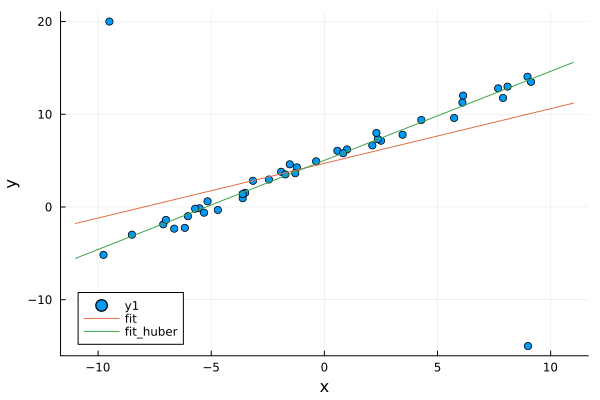

In [12]:
## Solve the Huber problem and look at the fit
x = Variable(n)
problem = minimize(sum(huber(b - A*x)))
solve!(problem, SCS.Optimizer)
xr = x.value
plot!([-11; 11], [1 -11; 1 11]*xr;label="fit_huber")

### Lecture 6

#### Optimization software

**Sudoku with Gurobi**

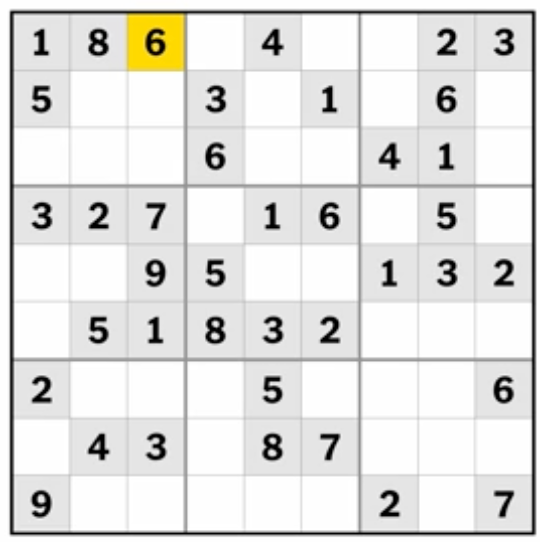

The more constraints you have, the easier the problem is.
Let
$$
x_{ijk}=\left\{\begin{split}&1, if x_{ij}=k \\ &0, else\end{split} \right.
$$

Constraints:
for row:
$$
\forall_{i,k} \sum_j x_{ijk}=1
$$

for column:
$$\forall_{j,k} \sum_i x_{ijk}=1$$
for each $ij$ in a $3 \times 3$ box, $$\sum x_{ijk}=1$$

Objective: $$\min \sum_{ijk} x_{ijk}$$

In [22]:
import Pkg; 
Pkg.add("StatsBase")
Pkg.add("Gurobi")
Pkg.add("JuMP")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [23]:
using Plots, LinearAlgebra, Random, StatsBase, SparseArrays
using Gurobi, JuMP
function sudoku_gurobi(X)

[ Info: Precompiling Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b]
ERROR: LoadError: SystemError: opening file "/Users/zhaorunchen/.julia/packages/Gurobi/FliRK/deps/deps.jl": No such file or directory
Stacktrace:
  [1] systemerror(p::String, errno::Int32; extrainfo::Nothing)
    @ Base ./error.jl:176
  [2] #systemerror#80
    @ ./error.jl:175 [inlined]
  [3] systemerror
    @ ./error.jl:175 [inlined]
  [4] open(fname::String; lock::Bool, read::Nothing, write::Nothing, create::Nothing, truncate::Nothing, append::Nothing)
    @ Base ./iostream.jl:293
  [5] open
    @ ./iostream.jl:275 [inlined]
  [6] open(f::Base.var"#387#388"{String}, args::String; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./io.jl:382
  [7] open
    @ ./io.jl:381 [inlined]
  [8] read
    @ ./io.jl:462 [inlined]
  [9] _include(mapexpr::Function, mod::Module, _path::String)
    @ Base ./loading.jl:1484
 [10] include(mod::Module, _path::String)
    @ Base ./Base.jl:419
 [11] include(

LoadError: Failed to precompile Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b] to /Users/zhaorunchen/.julia/compiled/v1.8/Gurobi/jl_hqRDyl.

In [19]:
# SUDOKU_GUROBI Solve a sedoku puzzle using Gurobi for an Binary LP
#
# S=sudoku_gurobi(X)
#   X has a set of initial conditions where anything ~= 1 ... 9 is an
#   unknown
# S is the solved sudoku puzzle

@assert(all(size(X) == (9, 9)))
# create variables
nvars = 9*9*9

# index the variables for easier access
vars = zeros(Int64, 9, 9, 9)
ind = 1
for i = 1:9
    for j = 1:9
        for v = 1:9
            vars[i, j, v] = ind
            ind = ind + 1
        end
    end
end

#obj = ones(Int64, 1, nvars) # no objective, just constraints

# add known cells as constraints

A = spzeros(nvars, 0)
b = ones(1, 0)

for i = 1:9
    for j = 1:9
        if X[i, j] < 1 || X[i, j] > 9
            # this is a free variable, ignore
        else
            # this is a constraint, add it
            cons = zeros(nvars)
            cons[vars[i, j, X[i, j]]] = 1
            A = [A sparse(cons)] # append a row
            b = [b 1]
        end
    end
end

#
# add sudoku constraints
#

# each cell only has one value
for i = 1:9
    for j = 1:9
        cons = zeros(Int64, nvars)
        for v = 1:9
            cons[vars[i, j, v]] = 1
        end
        A = [A sparse(cons)]
        b = [b 1]
    end
end

# each row has 1-9
for i = 1:9
    for v = 1:9
        cons = zeros(nvars)
        # the value v only appears in each row once
        for j = 1:9
            cons[vars[i, j, v]] = 1
        end
        A = [A sparse(cons)]
        b = [b 1]
    end
end

# each column has 1-9
for j = 1:9
    for v = 1:9
        cons = zeros(nvars)
        # the value v only appears in each row once
        for i = 1:9
            cons[vars[i, j, v]] = 1
        end
        A = [A sparse(cons)]
        b = [b 1]
    end
end

# subgrid has 1-9
for v = 1:9
    for i0 = 0:2
        for j0 = 0:2
            cons = zeros(nvars)
            for i = 1:3
                for j = 1:3
                    cons[vars[i+3*i0, j+3*j0, v]] = 1
                end
            end
            A = [A sparse(cons)]
            b = [b 1]
        end
    end
end

# setup Gurobi call
env = Gurobi.Env()

m = Model(Gurobi.Optimizer)

# add binary variables
@variable(m, x[1:nvars], binary=true)
#add_bvars!(model, zeros(nvars))

# have the variables incorporated into the model
#update_model!(model)

#add_constrs_t!(model, A, '=', vec(b))
@constraint(m, A'*x .== vec(b))

# run optimization
optimize!(m)

# get results
x = JuMP.value.(x)

# assign solution
S = zeros(Int64, 9 ,9)
for i = 1:9
    for j = 1:9
        for v = 1:9
            if x[vars[i, j, v]] > 0
                S[i, j] = v
            end
        end
    end
end
return S
end

X = [0 0 8 0 0 0 6 0 0;
 0 2 0 0 0 0 0 1 0;
 5 0 0 6 0 0 0 0 9;
 0 0 7 0 4 0 0 0 3;
 0 4 0 2 0 9 0 6 0;
 6 0 0 0 1 0 8 0 0;
 9 0 0 0 0 7 0 0 4;
 0 5 0 0 0 0 0 7 0;
 0 0 1 0 0 0 5 0 0];

S = sudoku_gurobi(X)

LoadError: UndefVarError: X not defined

**Optim.jl for Rosenbrock**


**Optim.jl for matrix factorization**

A software package for gradient-based optimization

**Input**: 
$$
\begin{split}
& f(x): R^n -> R \\ 
& g(x)=\frac{\partial f}{\partial x}\end{split}$$

How to specify a function for the machine to read?

Matrix Factorization
low rank decomposition
Given $A: M \times N$
$$
\min ||A-uv^T||_F^2
, s.t. u,v have rank k$$

**SVD** gives a closed-form solution for this problem.
$$
\begin{split}
& A = u \Sigma v^T \\
& u^Tu=I \\
& v^Tv=I
\end{split} 
$$

Solution by SVD:
$$
\begin{split}
& u^*=u[:,1:k]\Sigma[1:k,1:k] \\
& v^*=v[:,1:k]
\end{split}
$$

How about we only have partial entries of $A$?

To use Optim.jl, we need
$$\begin{split}
& f(u,v)=||A-uv^T||_F^2 =tr((A-uv^T)^T(A-uv^T))\\
& g(u,v)=\frac{\partial u}{\partial v}
\end{split}
$$

Notice that 
$$
\frac{tr(x^Ty)}{\partial x} = y, tr(A)=tr(A^T),tr(xyz)=tr(xzy)=tr(yzx)
$$
$$
\begin{split}
& \frac{\partial f}{\partial u} = -2(A-uv^T)v \\
& \frac{\partial f}{\partial v} = -2(A-uv^T)u
\end{split}
$$



In [25]:
using Plots, LinearAlgebra, Random, SparseArrays
Pkg.add("Optim")
using Optim

   Resolving package versions...
   Installed UnPack ───────────────── v1.0.2
   Installed PositiveFactorizations ─ v0.2.4
   Installed NLSolversBase ────────── v7.8.3
   Installed ConstructionBase ─────── v1.5.1
   Installed LineSearches ─────────── v7.2.0
   Installed ArrayInterface ───────── v7.2.0
   Installed Adapt ────────────────── v3.6.1
   Installed Setfield ─────────────── v1.1.1
   Installed FillArrays ───────────── v0.13.7
   Installed Parameters ───────────── v0.12.3
   Installed FiniteDiff ───────────── v2.18.0
   Installed Optim ────────────────── v1.7.4
    Updating `~/.julia/environments/v1.8/Project.toml`
  [429524aa] + Optim v1.7.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [79e6a3ab] + Adapt v3.6.1
  [4fba245c] + ArrayInterface v7.2.0
  [187b0558] + ConstructionBase v1.5.1
  [1a297f60] + FillArrays v0.13.7
  [6a86dc24] + FiniteDiff v2.18.0
  [d3d80556] + LineSearches v7.2.0
  [d41bc354] + NLSolversBase v7.8.3
  [429524aa] + Optim v1.7.4
  [d96e819e] +

In [26]:
# example of Rosenbrock function
function f(x) 
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end
function g!(storage::Vector, x::Vector)
storage[1] = -2.0 .* (1.0 - x[1]) - 400.0 .* (x[2] - x[1]^2) * x[1]
storage[2] = 200.0 .* (x[2] - x[1]^2)
end

soln = optimize(f, g!, [0.0, 0.0], BFGS())
soln = optimize(f, g!, [0.0, 0.0], GradientDescent())

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.154719e-03

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.82e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.95e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.18e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.97e-03 ≰ 0.0e+00
    |g(x)|                 = 8.21e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2532
    ∇f(x) calls:   2532


In [27]:
# now, we do the matrix factorization example
# originally from Poblano example2

function matrix_approx_function(x::Vector, A::Matrix, r::Int)
    # unpack U and V from x
    m,n = size(A)
    U = reshape(x[1:m*r],m,r)
    V = reshape(x[(m*r+1):end],n,r)
    return 0.5*norm(A - U*V')^2 
end

function matrix_approx_gradient!(storage::Vector, x::Vector, A::Matrix, r::Int)
    m,n = size(A)
    U = reshape(x[1:m*r],m,r)
    V = reshape(x[(m*r+1):end],n,r)
    D = A - U*V'
    storage[1:(m*r)] = -vec(D*V)
    storage[(m*r+1):end] = -vec(D'*U)
end

m = 10
n = 8
#A = randn(m,n)
A = Matrix(1.0I,m,n)
r = 2
myf = x -> matrix_approx_function(x, A, r)
myg! = (x, storage) -> matrix_approx_gradient!(x, storage, A, r)

soln = optimize(myf, myg!, ones(m*r+n*r), BFGS(), Optim.Options(f_tol = 1e-8))
#soln = optimize(myf, myg!, randn(m*r+n*r), BFGS(), Optim.Options(f_tol = 1e-8))
x = Optim.minimizer(soln)
@show soln
Uopt = reshape(x[(1:m*r)],m,r)
Vopt = reshape(x[(m*r+1):end],n,r)
objval = 2*myf(x)
opterr = norm(A-Uopt*Vopt')^2

Usvd,Ssvd,Vsvd = svd(A)
svderr = norm(A-Usvd[:,1:r]*Diagonal(Ssvd[1:r])*Vsvd[:,1:r]')^2
@show objval
@show opterr
@show svderr
; # hide final output in JuliaBox

soln =  * Status: success

 * Candidate solution
    Final objective value:     3.500000e+00

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.60e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.64e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.22e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.21e-11 ≤ 1.0e-08
    |g(x)|                 = 5.43e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    11
    f(x) calls:    31
    ∇f(x) calls:   31

objval = 7.000000000000001
opterr = 7.000000000000001
svderr = 5.999999999999999
